# Name - Rhea Simon

# Unsupervised Machine Learning
Task 2 : Prediction using Unsupervised Machine Learning

In unsupervised machine learning we do not predict the output. We just form a clusters.

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
# Importing Dataset

# Load the 'Iris' dataset.

iris= datasets.load_iris()
data= pd.DataFrame(iris.data, columns= iris.feature_names)

In [3]:
data.head() #Checking the first 5 rows of iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.tail() #cheacking last 5 rows of iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
data.shape

(150, 4)

In [6]:
data.info()  # Performing this function we can identify that how many numerical variables and how many categorical valriale present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.isnull().sum()  #cheking there is any null values present in dataset.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
data.describe() # describe function is used for describing our dataset, means finding out mean,max,standard deviation, 25%,50% etc values, note that describe function works only on numerical values.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Seprating the values into independant variable

In [9]:
x = data.iloc[:,0:4].values   #seprating values into x varialbe all values store in x variable
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Data Visualization

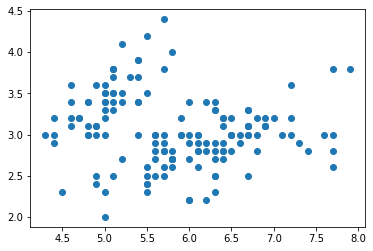

In [10]:
plt.scatter(x[:,0],x[:,1])

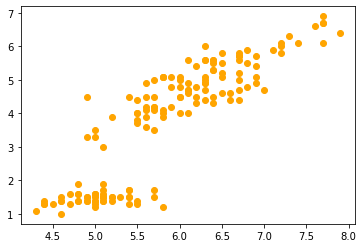

In [11]:
plt.scatter(x[:,0],x[:,2],color='orange')

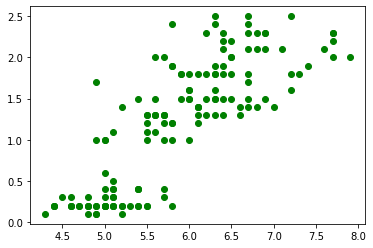

In [12]:
plt.scatter(x[:,0],x[:,3],color='g')

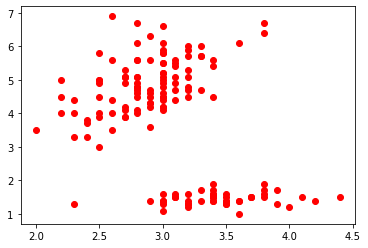

In [13]:
plt.scatter(x[:,1],x[:,2],color='r')

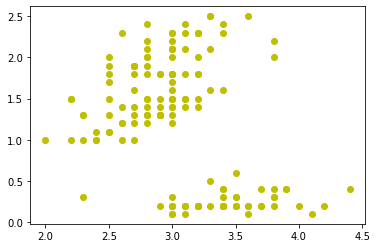

In [14]:
plt.scatter(x[:,1],x[:,3],color='y')

# K-Means
Find the optimum number of clusters for K Means? Determine the value of K?# 

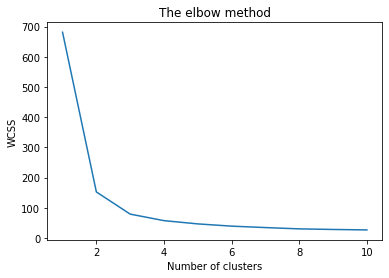

In [16]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above graph is Elbow graph used to find the value of K in K-Means, on x-axis there are number of clusters and on y-axis WCSS.

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier.
# We can choose the number of clusters as 3 from above graph.

kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans= kmeans.fit_predict(x)

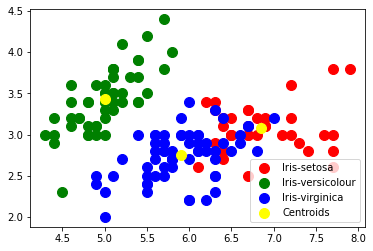

In [18]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans== 0,0], x[y_kmeans== 0,1], s= 100, c='r', label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans== 1,1], s= 100, c='g', label= 'Iris-versicolour')
plt.scatter(x[y_kmeans== 2,0], x[y_kmeans== 2,1], s= 100, c='b', label= 'Iris-virginica')

# Plotting the centroids of the clusters.

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

 Completed the Prediction Using Unsupervised Machine Learning task